In [17]:
%cd /Users/balandat/Documents/Code/eclipse\ workspace/cont_no_regret/
import pickle
import ContNoRegret
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from ContNoRegret.Potentials import ExponentialPotential
from ContNoRegret.utils import visualize_potentials, plot_loglogs, plot_snapshots

/Users/balandat/Documents/Code/eclipse workspace/cont_no_regret


## Load in data

In [18]:
filename = '/home/max/Documents/CNR_results/2015-06-23/
results = []
with open(filename, 'rb') as f:
    results += pickle.load(f)
with open('/home/max/Documents/CNR_results/aggregate.piggl', 'rb') as f:
    results += pickle.load(f)
Naff = len([res for res in results if 'Affine' in res.label])
Nquad = len([res for res in results if 'Quad' in res.label])
Npoly = len([res for res in results if 'Polynomial' in res.label])

FileNotFoundError: [Errno 2] No such file or directory: '/home/max/Documents/CNR_results/2015-06-23_23-13/ICML_regrets_Affine.piggl'

In [42]:
Naff, Nquad, Npoly

(35, 10, 10)

In [31]:
# with open('/home/max/Documents/CNR_results/aggregate.piggl', 'wb') as f:
#     pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

# Comparison of Different Loss Functions

['Affine_18', 'Affine_1', 'Affine_4', 'Polynomial_2', 'Polynomial_3', 'Affine_2', 'Polynomial_7', 'Affine_5', 'Affine_7', 'Affine_3', 'Polynomial_8', 'Quadratic_5', 'Polynomial_5', 'Affine_13', 'Affine_16', 'Affine_12', 'Polynomial_6', 'Polynomial_0', 'Affine_11', 'Polynomial_1', 'Affine_14', 'Quadratic_1', 'Affine_17', 'Quadratic_8', 'Quadratic_2', 'Quadratic_6', 'Quadratic_4', 'Quadratic_0', 'Affine_19', 'Affine_15', 'Quadratic_3', 'Affine_6', 'Polynomial_4', 'Polynomial_9', 'Affine_8', 'Affine_0', 'Quadratic_9', 'Affine_9', 'Quadratic_7', 'Affine_10']


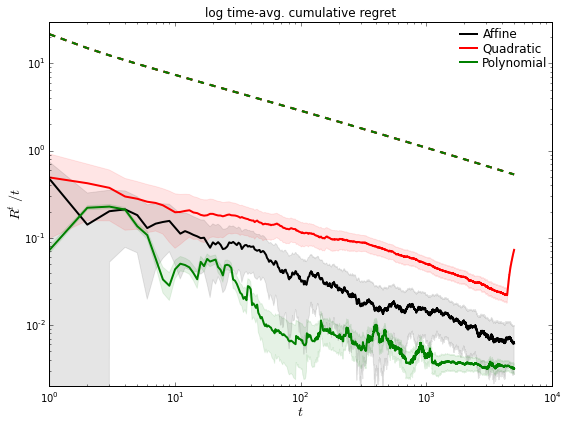

In [43]:
dict_results = {r.label : r for r in results}
T = results[0].problem.T
print(list(dict_results.keys()))

# aggregate simulations over different sequence of loss functions
lftypes = ['Affine', 'Quadratic', 'Polynomial']
colors = ['k', 'r', 'g', 'b', 'm', 'c']
f, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_title('log time-avg. cumulative regret')
ax.set_xlabel('$t$', fontsize=14, labelpad=0)
ax.set_ylabel('$R^t/t$', fontsize=14, labelpad=-2)
for i,lftype in enumerate(lftypes):
    bnd = [res.regs_norate['tsavgbnd'][0] for key,res in dict_results.items() if lftype in key][0]
    tsavgs = [res.regs_norate['tsavg'][0] for key,res in dict_results.items() if lftype in key]
    uppers = [res.regs_norate['tavg_perc_90'][0] for key,res in dict_results.items() if lftype in key]
    lowers = [res.regs_norate['tavg_perc_10'][0] for key,res in dict_results.items() if lftype in key]
    tsavg = np.average(tsavgs, axis=0)
    upper_avg = np.average(uppers, axis=0)
    lower_avg = np.average(lowers, axis=0)
    lltsavg = ax.plot(np.arange(1,T+1), tsavg, linewidth=2.0, color=colors[i], label=lftype, rasterized=True)
    ax.fill_between(np.arange(1,T+1), lower_avg, upper_avg, color=colors[i], alpha=0.1, rasterized=True)
    ax.plot(np.arange(1,T+1), bnd, linestyle='--', color=colors[i], linewidth=2, rasterized=True)
# make plots pretty and show legend
ax.set_yscale('log'), ax.set_xscale('log')
ax.set_ylim((2e-3, 30))
ax.legend(prop={'size':12}, frameon=False, loc='upper right', labelspacing=0.1, 
              handletextpad=0.2, borderpad=0) 
plt.tight_layout()
save_name = '/Users/balandat/Documents/Code/Continuous_No-Regret/ICML/presentation/simulation/loglog_regrets.pdf'
# plt.savefig(save_name, bbox_inches='tight', dpi=300)

# Plots associated with animation example

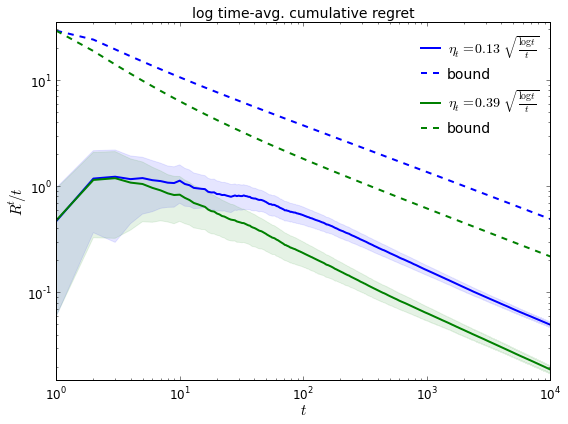

In [38]:
filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/results/2015-06-23_22-38/ICML_video_Quadratic.piggl'
with open(filename, 'rb') as f:
    results = pickle.load(f)
T = results[0].problem.T
M = results[0].problem.M
pot = ExponentialPotential()
t = 1 + np.arange(T)
n, D, L, v = results[0].problem.domain.n, results[0].problem.domain.diameter, results[0].problem.L, results[0].problem.domain.v
thetas = [0.13, 0.39]
labels = [r'$\eta_t = {{{0:.2f}}}$'.format(theta) + r' $\sqrt{\frac{\log t}{t}}$' for theta in thetas]
reg_bnds = [M*2*theta/8/0.5*np.sqrt(np.log(t)/t)+ L*D/t +n/theta*np.sqrt(np.log(t)/t) for theta in thetas]
            
f, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_title('log time-avg. cumulative regret', fontsize=14)
ax.set_xlabel('$t$', fontsize=15, labelpad=0)
ax.set_ylabel(r'$R^t\!/t$', fontsize=15, labelpad=-2)
for res, label, reg_bnd in zip(results, labels, reg_bnds):
    lltsavg = ax.plot(np.arange(1,T+1), res.regs_norate['tsavg'][0], linewidth=2.0, 
                      label=label, rasterized=True)
    ax.fill_between(np.arange(1,T+1), res.regs_norate['tavg_perc_10'][0], res.regs_norate['tavg_perc_90'][0],
                    color=lltsavg[0].get_color(), alpha=0.1, rasterized=True)
    ax.plot(np.arange(1,T+1), reg_bnd, linestyle='--', linewidth=2, 
            color=lltsavg[0].get_color(), rasterized=True, label='bound')
# make plots pretty and show legend
ax.set_yscale('log'), ax.set_xscale('log')
ax.set_ylim((1.5e-2, 35))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(prop={'size':14}, frameon=False, loc='upper right', labelspacing=0.5, 
              handletextpad=0.25, borderpad=0.25) 
plt.tight_layout()
save_name = '/Users/balandat/Documents/Code/Continuous_No-Regret/ICML/presentation/simulation/video_regrets.pdf'
plt.savefig(save_name, bbox_inches='tight', dpi=300)